In [30]:
# Created By Mohsen Naghipourfar

%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../Data/fpkm_normalized.csv', header=None)
labels = pd.read_csv('../Data/disease.csv', header=None)
results = pd.read_csv('../New Results/Results/CSVs/result_200.csv', header=None)
diseases = labels[0].value_counts().index

In [43]:
random_feature_indices = np.random.choice(19671, 50, replace=False)
x_train = data[random_feature_indices]

y_dummies = pd.get_dummies(labels[0])
del y_dummies[y_dummies.columns[-1]]
data_with_categories = pd.concat([x_train, y_dummies], axis=1)

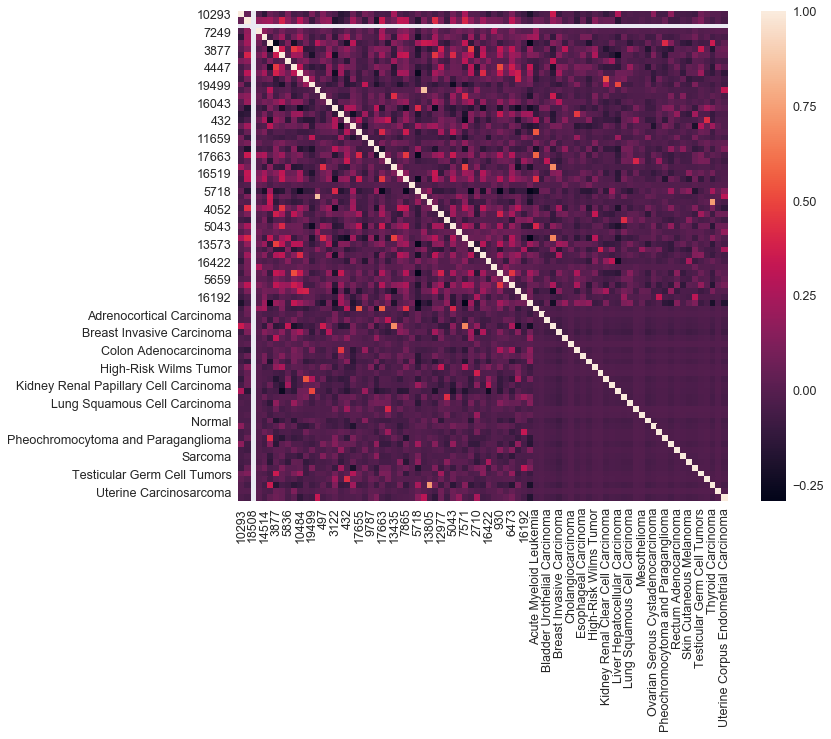

In [47]:
# Pearson Correlation (Which is not good for categorical Data! :)
corr_matrix = data_with_categories.corr()
# correlation_matrix = np.corrcoef(new_data.values)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=1, square=True)
plt.savefig('./heatmap.png')

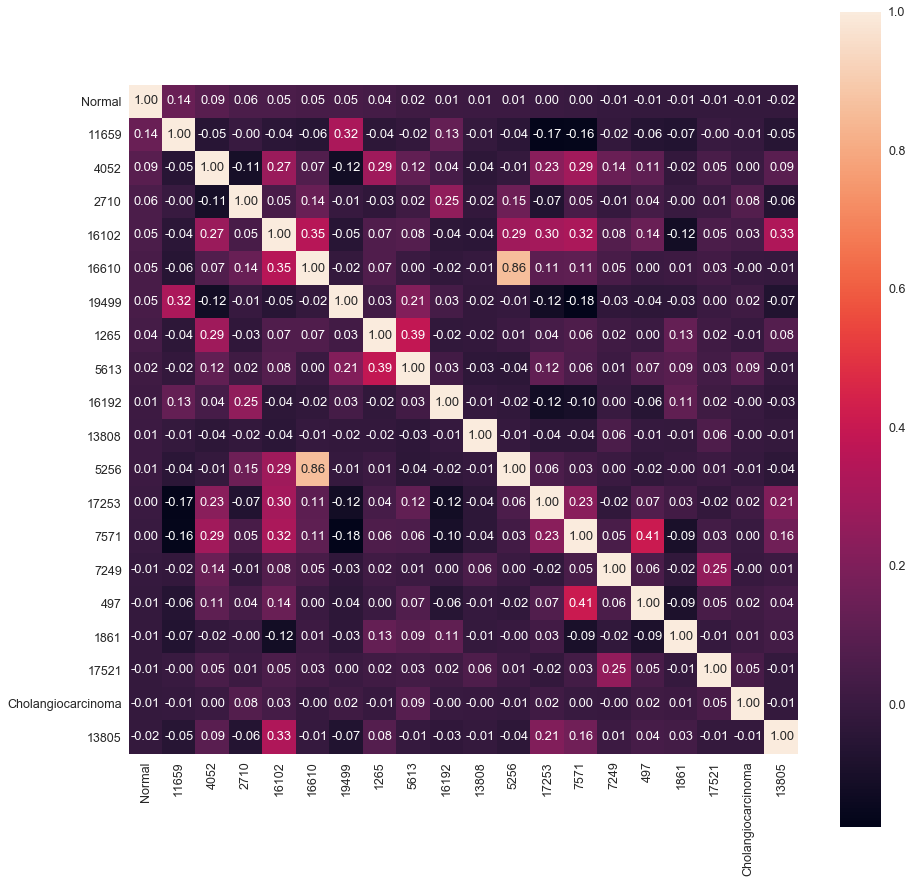

In [48]:
k = 20 # Number of Variables for Heatmap
cols = corr_matrix.nlargest(k, 'Normal')['Normal'].index
# cols = corr_matrix.nlargest(k, '').index
cm = np.corrcoef(data_with_categories[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(15,15))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.yticks(rotation=0)
# plt.figure(figsize=(20, 20))
plt.show()


In [50]:
mutual_matrix = mutual_info_classif(x_train, labels[0])
mutual_matrix
# sns.set(font_scale=1.25)
# plt.subplots(figsize=(15,15))
# hm = sns.heatmap(mutual_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, 
#                  yticklabels=cols.values, xticklabels=cols.values)
# plt.yticks(rotation=0)
# plt.figure(figsize=(20, 20))
# plt.show()

array([0.25252903, 0.17349196, 0.00242411, 0.0369519 , 0.17337936,
       0.49166488, 0.39716273, 0.2496174 , 0.44201384, 0.29945187,
       0.21528675, 0.31697586, 0.39628768, 0.33130372, 0.28982634,
       0.22425345, 0.19620333, 0.3708153 , 0.39351754, 0.26938443,
       0.13250889, 0.38271261, 0.28209602, 0.26291124, 0.24668703,
       0.29365947, 0.28192948, 0.17832445, 0.28477588, 0.01445839,
       0.34498287, 0.33130946, 0.34323359, 0.23678693, 0.18577611,
       0.34113366, 0.28142732, 0.11830536, 0.48668615, 0.34348703,
       0.42024009, 0.23069658, 0.41619812, 0.00579947, 0.21891638,
       0.21891477, 0.28317957, 0.24783463, 0.35081836, 0.38209404])

In [6]:
# Boxplots: Feature-Label plot

# facet = sns.lmplot(data=data_to_plot, x='x', y='y', hue='label', fit_reg=False, legend=True, legend_out=True)

# for label in labels[0].value_counts().index:

#     for l, row in data_to_plot.loc[data_to_plot['label']==label,:].iterrows():
    
#         #add the data point as text
#         plt.annotate(row['label'], 
#                      (row['x'], row['y']),
#                      horizontalalignment='center',
#                      verticalalignment='center',
#                      size=11) 
# sns.swarmplot(x="x", y="y", data=data_to_plot, linewidth=0.1)
for i in range(x_train.shape[1]):
    data_to_plot = pd.concat([x_train[random_feature_indices[i]], labels], axis=1)
    data_to_plot.columns = ['feature', 'label']
    plt.xticks(rotation=90)
    sns.boxplot(x='label', y='feature', data=data_to_plot)
    plt.ylabel('feature {0}'.format(random_feature_indices[i]))
    plt.savefig('./Plots/box_{0}'.format(random_feature_indices[i]))
    plt.close()